In [185]:
%cd /home/bap/hana/EDA and Visualization/hanlhn/hanlhn

/home/bap/hana/EDA and Visualization/hanlhn/hanlhn


In [186]:
!pwd

/home/bap/hana/EDA and Visualization/hanlhn/hanlhn


## Import Libraries

In [187]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from pandas_profiling import ProfileReport
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [188]:
data = pd.read_excel('dataset/dataset_01/Sample - Superstore.xls')
data.head(5)

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   South  FUR-BO-10001798        Furniture    Bookcases   
1       42420   South  FUR-CH-10000454        Furniture       Chairs   
2       90036    West  OFF-LA-10000240  Office Supplies       Labels   
3       33311   South  FUR-TA-10000577        Furniture       Tables   
4       33311   South  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales  Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600         2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400         3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200         2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775         5   
4                     Eldon Fold 'N Roll Cart System   22.3680         2   

   Discount    Profit  
0      0.00   41.9136  
1      0.00  219.5820  
2      0.00    6.8714  
3      0.45 -383.0310  
4      0.20    2.5164  

[5 rows x 21 columns]

## Check null values

In [189]:
data.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

## Check duplicated values

In [190]:
data.duplicated().sum()

0

## Create `year` and `month` columns for future use

In [191]:
data['year'] = data['Ship Date'].dt.year
data['month'] = data['Ship Date'].dt.month
data.head(5)

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
1       2  CA-2016-152156 2016-11-08 2016-11-11    Second Class    CG-12520   
2       3  CA-2016-138688 2016-06-12 2016-06-16    Second Class    DV-13045   
3       4  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   
4       5  US-2015-108966 2015-10-11 2015-10-18  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

        Product ID         Category Sub-Category  \
0  FUR-BO-10001798        Furniture    Bookcases   
1  FUR-CH-10000454        Furniture       Chairs   
2  OFF-LA-10000240  Office Supplies       Labels   
3  FUR-TA-10000577        Furniture       Tables   
4  OFF-ST-10000760  Office Supplies      Storage   

                                        Product Name     Sales Quantity  \
0                  Bush Somerset Collection Bookcase  261.9600        2   
1  Hon Deluxe Fabric Upholstered Stacking Chairs,...  731.9400        3   
2  Self-Adhesive Address Labels for Typewriters b...   14.6200        2   
3      Bretford CR4500 Series Slim Rectangular Table  957.5775        5   
4                     Eldon Fold 'N Roll Cart System   22.3680        2   

  Discount    Profit  year  month  
0     0.00   41.9136  2016     11  
1     0.00  219.5820  2016     11  
2     0.00    6.8714  2016      6  
3     0.45 -383.0310  2015     10  
4     0.20    2.5164  2015     10  

[5 rows x 23 columns]

## Overview Dataset

In [192]:
profile = ProfileReport(data, title="Sample SuperStone Sales")
profile

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.65s/it]


#*After overvewing, I see the data only contains a few records that have  `Order Date` and `Ship Date` in 2018, so I decide to drop them*

In [193]:
data = data[data["year"] <= 2017]

## Q1: How have `Profit` and `Sales` changed over the `years`?

In [194]:
q1 = pd.DataFrame(data.groupby(['year'])['Profit', 'Sales'].sum())
q1["year"] = data["year"].sort_values().unique()
q1

Profit        Sales  year
year                               
2014  47292.7255  470383.1931  2014
2015  62881.5299  479442.5020  2015
2016  82941.1017  611325.7530  2016
2017  92346.8752  730889.7154  2017

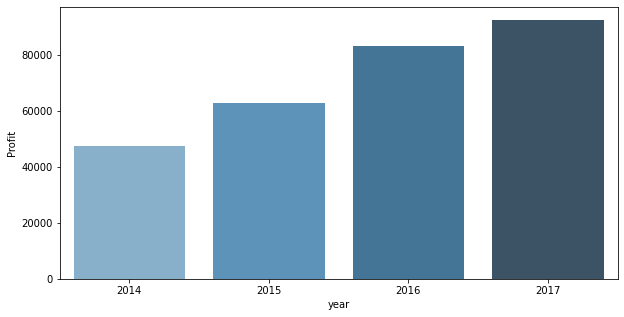

In [195]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x="year", y="Profit", data=q1, palette="Blues_d")

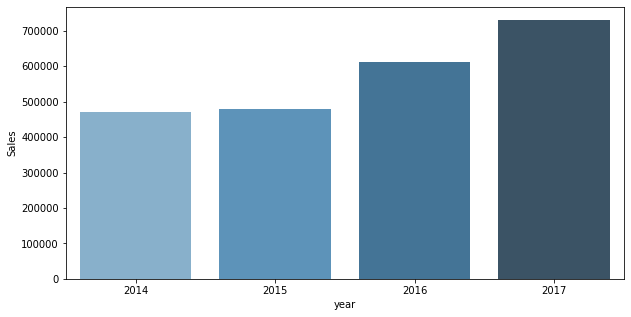

In [196]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x="year", y="Sales", data=q1, palette="Blues_d")

## Q2: How do `Profit Rate` (Profit/Sales) over `years`?

In [197]:
q2 = q1.copy()
q2["Profit_Rate"] = q2["Profit"] / q1["Sales"]
q2

Profit        Sales  year  Profit_Rate
year                                            
2014  47292.7255  470383.1931  2014     0.100541
2015  62881.5299  479442.5020  2015     0.131156
2016  82941.1017  611325.7530  2016     0.135674
2017  92346.8752  730889.7154  2017     0.126349

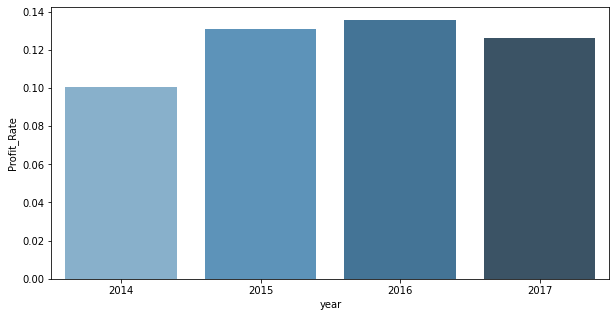

In [198]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x="year", y="Profit_Rate", data=q2, palette="Blues_d")

## Q3: How do `Profit` and `Sales` change over `months` in `2017`?

In [199]:
q3 = data[data['year'] == 2017]
q3.groupby(['month'], as_index = False)['Profit', 'Sales'].sum()
q3.head(5)

Row ID        Order ID Order Date  Ship Date       Ship Mode Customer ID  \
12      13  CA-2017-114412 2017-04-15 2017-04-20  Standard Class    AA-10480   
23      24  US-2017-156909 2017-07-16 2017-07-18    Second Class    SF-20065   
34      35  CA-2017-107727 2017-10-19 2017-10-23    Second Class    MA-17560   
41      42  CA-2017-120999 2017-09-10 2017-09-15  Standard Class    LC-16930   
43      44  CA-2017-139619 2017-09-19 2017-09-23  Standard Class    ES-14080   

      Customer Name      Segment        Country          City  ...  \
12     Andrew Allen     Consumer  United States       Concord  ...   
23  Sandra Flanagan     Consumer  United States  Philadelphia  ...   
34     Matt Abelman  Home Office  United States       Houston  ...   
41   Linda Cazamias    Corporate  United States    Naperville  ...   
43       Erin Smith    Corporate  United States     Melbourne  ...   

         Product ID         Category Sub-Category  \
12  OFF-PA-10002365  Office Supplies        Paper   
23  FUR-CH-10002774        Furniture       Chairs   
34  OFF-PA-10000249  Office Supplies        Paper   
41  TEC-PH-10004093       Technology       Phones   
43  OFF-ST-10003282  Office Supplies      Storage   

                                         Product Name    Sales Quantity  \
12                                         Xerox 1967   15.552        3   
23                 Global Deluxe Stacking Chair, Gray   71.372        2   
34                                  Easy-staple paper   29.472        3   
41                                 Panasonic Kx-TS550  147.168        4   
43  Advantus 10-Drawer Portable Organizer, Chrome ...   95.616        2   

   Discount   Profit  year  month  
12      0.2   5.4432  2017      4  
23      0.3  -1.0196  2017      7  
34      0.2   9.9468  2017     10  
41      0.2  16.5564  2017      9  
43      0.2   9.5616  2017      9  

[5 rows x 23 columns]

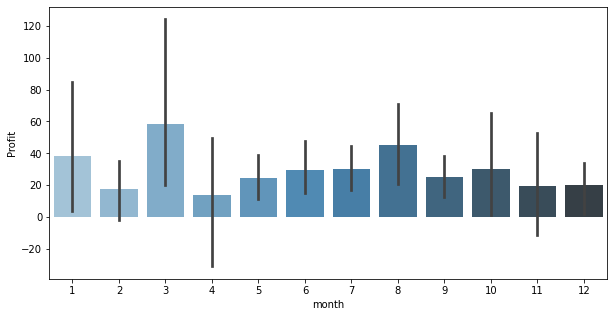

In [200]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x="month", y="Profit", data=q3, palette="Blues_d")

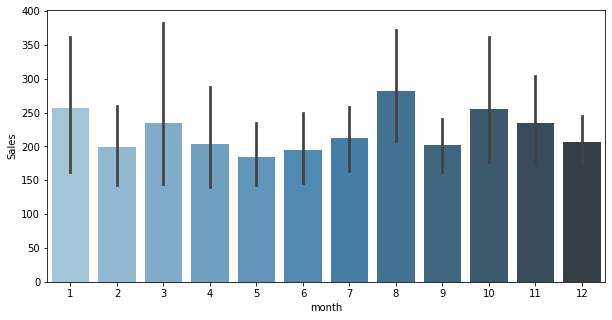

In [201]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.barplot(x="month", y="Sales", data=q3, palette="Blues_d")

## Q4: Which `states` have the `highest return rates`?

In [202]:
q4 = data.groupby(['State'], as_index = False)['Profit', 'Sales'].sum()
q4['Rate'] = q4['Profit'] / (q4['Sales'] - q4['Profit']) * 100
highest_return_rate = q4[q4['Rate'] == q4['Rate'].max()]
highest_return_rate

State     Profit    Sales       Rate
7  District of Columbia  1059.5893  2865.02  58.689004

## Q5: Which `categories` have the `highest return rates`?

In [203]:
q5 = data.groupby(['Category'], as_index = False)['Profit', 'Sales'].sum()
q5['Rate'] = q5['Profit'] / (q5['Sales'] - q5['Profit']) * 100
highest_return_rate = q5[q5['Rate'] == q5['Rate'].max()]
highest_return_rate

Category       Profit       Sales       Rate
2  Technology  145425.5325  835745.877  21.066384

## Q6: Which `month` of the `year` has the `most orders`?

In [204]:
q6 = pd.DataFrame(data.groupby(['year', 'month'], as_index = False)['Order ID'].count())
most_orders = q6[q6['Order ID'] == q6['Order ID'].max()]
most_orders

year  month  Order ID
47  2017     12       469

## Q7: Top `10 best-selling` products?

In [205]:
q7 = pd.DataFrame(data.groupby(['Product Name'], as_index = False)['Order ID'].count())
q7 = q7.sort_values('Order ID')
q7.tail(10)

Product Name  Order ID
1449  Situations Contoured Folding Chairs, 4/Set        15
1510                     Storex Dura Pro Binders        16
1496                  Staple-based wall hangings        16
1495                              Staple remover        17
1499                     Staples in misc. colors        18
941                   KI Adjustable-Height Table        18
258                      Avery Non-Stick Binders        20
1498                                     Staples        46
536                            Easy-staple paper        46
1492                             Staple envelope        48

## Q8: Which `sub-category` are usually `sold together`?

In [228]:
q8 = data.groupby(['Order ID'], as_index=False)['Sub-Category'].apply(lambda x: "[%s]" % ', '.join(x))
q8[:50]

Order ID                                       Sub-Category
0   CA-2014-100006                                           [Phones]
1   CA-2014-100090                                  [Tables, Binders]
2   CA-2014-100293                                            [Paper]
3   CA-2014-100328                                          [Binders]
4   CA-2014-100363                                 [Fasteners, Paper]
5   CA-2014-100391                                            [Paper]
6   CA-2014-100678              [Art, Chairs, Envelopes, Accessories]
7   CA-2014-100706                         [Accessories, Furnishings]
8   CA-2014-100762                        [Art, Labels, Paper, Paper]
9   CA-2014-100860                                           [Labels]
10  CA-2014-100867                                           [Phones]
11  CA-2014-100881                                           [Phones]
12  CA-2014-100895                             [Art, Phones, Storage]
13  CA-2014-100916                             [Storage, Tables, Art]
14  CA-2014-100972                                            [Paper]
15  CA-2014-101147                                       [Appliances]
16  CA-2014-101175                                          [Storage]
17  CA-2014-101266                                            [Paper]
18  CA-2014-101364                                          [Binders]
19  CA-2014-101392                                          [Storage]
20  CA-2014-101427                                              [Art]
21  CA-2014-101462                                      [Furnishings]
22  CA-2014-101476                                         [Machines]
23  CA-2014-101560                 [Furnishings, Paper, Art, Binders]
24  CA-2014-101602                                   [Phones, Chairs]
25  CA-2014-101770                                          [Binders]
26  CA-2014-101833                                            [Paper]
27  CA-2014-101931  [Binders, Supplies, Supplies, Bookcases, Storage]
28  CA-2014-102008                                            [Paper]
29  CA-2014-102085                                           [Labels]
30  CA-2014-102274                      [Phones, Paper, Storage, Art]
31  CA-2014-102295                                           [Chairs]
32  CA-2014-102330                                   [Labels, Phones]
33  CA-2014-102645                                            [Paper]
34  CA-2014-102652           [Furnishings, Furnishings, Paper, Paper]
35  CA-2014-102673                   [Fasteners, Art, Labels, Phones]
36  CA-2014-102869          [Paper, Accessories, Furnishings, Phones]
37  CA-2014-102988                [Art, Phones, Paper, Art, Supplies]
38  CA-2014-103058                                      [Accessories]
39  CA-2014-103086                                      [Furnishings]
40  CA-2014-103100                                  [Labels, Binders]
41  CA-2014-103191                                          [Storage]
42  CA-2014-103219                                      [Furnishings]
43  CA-2014-103310                  [Paper, Phones, Supplies, Chairs]
44  CA-2014-103317                [Furnishings, Binders, Furnishings]
45  CA-2014-103331                        [Furnishings, Paper, Paper]
46  CA-2014-103366                                      [Accessories]
47  CA-2014-103373                                           [Phones]
48  CA-2014-103401                                            [Paper]
49  CA-2014-103429               [Binders, Phones, Appliances, Paper]

## Q9: `Why` did `sales` increase `strongly`, but `profit` increased very `slowly`?

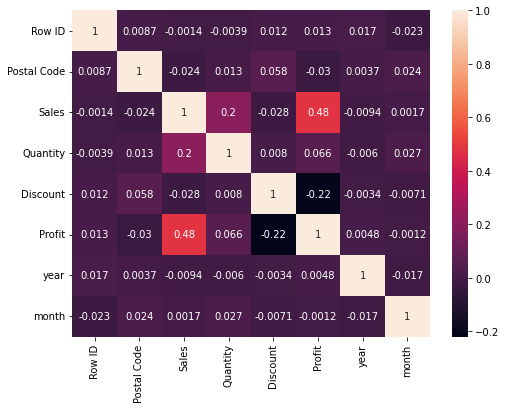

In [207]:
corr_mat = data.corr()
fig, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(corr_mat, annot=True)

In [208]:
q9 = data[['Ship Date', 'Profit', 'Sales', 'Discount']]
q9 = q9.sort_values(['Ship Date', 'Discount'])
q9

Ship Date    Profit    Sales  Discount
7180 2014-01-07    5.2398   12.780       0.0
7980 2014-01-07    5.5512   16.448       0.2
5327 2014-01-08    9.3312   19.440       0.0
739  2014-01-08    4.2717   11.784       0.2
740  2014-01-08  -64.7748  272.736       0.2
...         ...       ...      ...       ...
2874 2017-12-31    2.9547    6.030       0.0
5147 2017-12-31    1.9224    8.544       0.2
5148 2017-12-31  105.2970  842.376       0.2
6149 2017-12-31  -34.0704  340.704       0.2
6089 2017-12-31   -0.9900    1.188       0.7

[9952 rows x 4 columns]

## Q10: `Why` does `profit increase` but `profit rate decreases`?

In [212]:
q10 = data[['Ship Date', 'Profit', 'Sales']]
q10['Profit Rate'] = q10['Profit'] / q10['Sales']
q10 = q10.groupby(['Ship Date'], as_index=False)['Profit Rate'].mean()
q10

Ship Date  Profit Rate
0    2014-01-07     0.373750
1    2014-01-08    -0.236250
2    2014-01-10     0.291429
3    2014-01-12    -0.733333
4    2014-01-13     0.218750
...         ...          ...
1324 2017-12-27     0.108611
1325 2017-12-28     0.251787
1326 2017-12-29     0.289792
1327 2017-12-30    -0.054271
1328 2017-12-31    -0.015556

[1329 rows x 2 columns]